In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
df= pd.read_csv('train.csv')
df.head()

ID  A1_Score  A2_Score  A3_Score  ...     result     age_desc  relation  Class/ASD
0   1         1         0         1  ...   6.351166  18 and more      Self          0
1   2         0         0         0  ...   2.255185  18 and more      Self          0
2   3         1         1         1  ...  14.851484  18 and more      Self          1
3   4         0         0         0  ...   2.276617  18 and more      Self          0
4   5         0         0         0  ...  -4.777286  18 and more      Self          0

[5 rows x 22 columns]

In [7]:
df.shape

(800, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [13]:
df.describe()

ID    A1_Score    A2_Score  ...         age      result   Class/ASD
count  800.0000  800.000000  800.000000  ...  800.000000  800.000000  800.000000
mean   400.5000    0.560000    0.530000  ...   28.452118    8.537303    0.201250
std    231.0844    0.496697    0.499411  ...   16.310966    4.807676    0.401185
min      1.0000    0.000000    0.000000  ...    2.718550   -6.137748    0.000000
25%    200.7500    0.000000    0.000000  ...   17.198153    5.306575    0.000000
50%    400.5000    1.000000    1.000000  ...   24.848350    9.605299    0.000000
75%    600.2500    1.000000    1.000000  ...   35.865429   12.514484    0.000000
max    800.0000    1.000000    1.000000  ...   89.461718   15.853126    1.000000

[8 rows x 14 columns]

In [15]:
df['age'] = df['age'] .astype(int)

In [21]:
for col in df.columns:
    print(col, df[col].unique())
    print("--"*25)

ID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246

In [39]:
categorical = df.select_dtypes(include=['object']).columns
type(categorical)

pandas.core.indexes.base.Index

In [41]:
# define the mapping dictionary for country names
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

# repalce value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [43]:
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [45]:
df = df.drop(columns=["ID", "age_desc"])

In [47]:
df.shape

(800, 20)

Mean: 27.96375
Median: 24.0


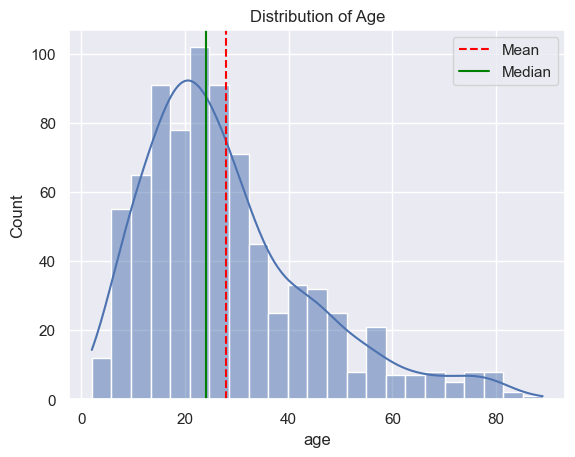

In [51]:
# Histogram for "age"

sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

# calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)


# add vertical lines for mean and median
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean: 8.537303106501248
Median: 9.605299308


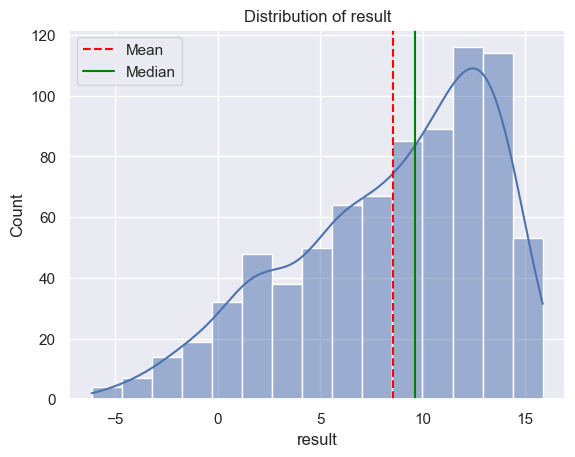

In [53]:
# Histogram for "result"

sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")

# calculate mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)


# add vertical lines for mean and median
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

In [69]:
num = df.select_dtypes(include=[np.number]).columns
num[10:]

Index(['age', 'result', 'Class/ASD'], dtype='object')

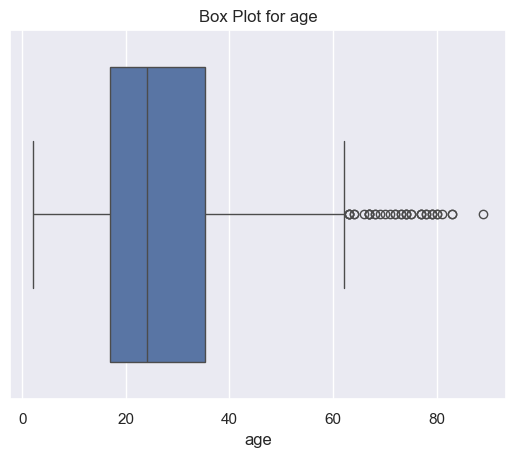

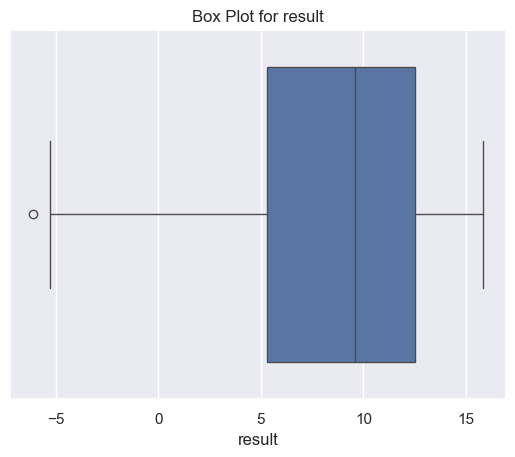

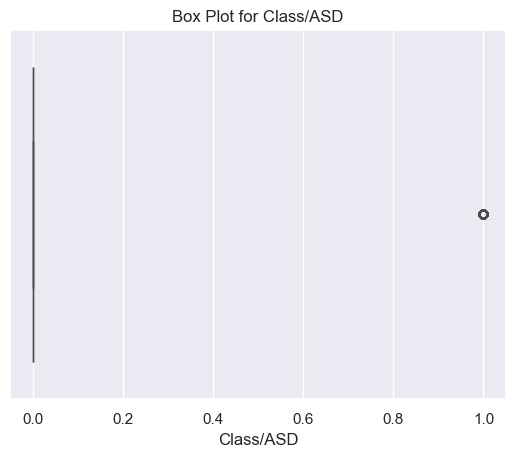

In [71]:
for col in num[10:]:
    # box plot
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
    plt.show()

In [73]:
# count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [77]:
len(age_outliers)

39

In [79]:
# count the outliers using IQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [81]:
len(result_outliers)

1

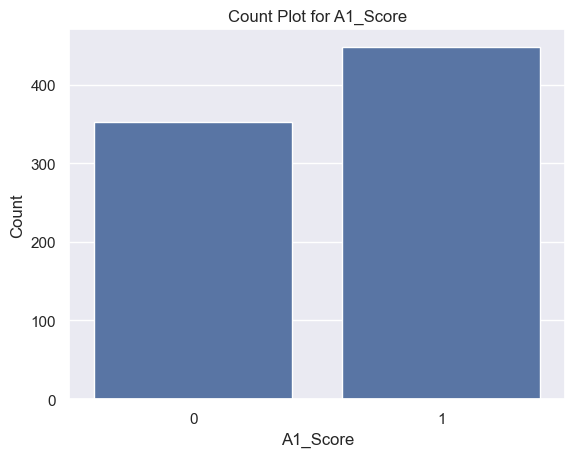

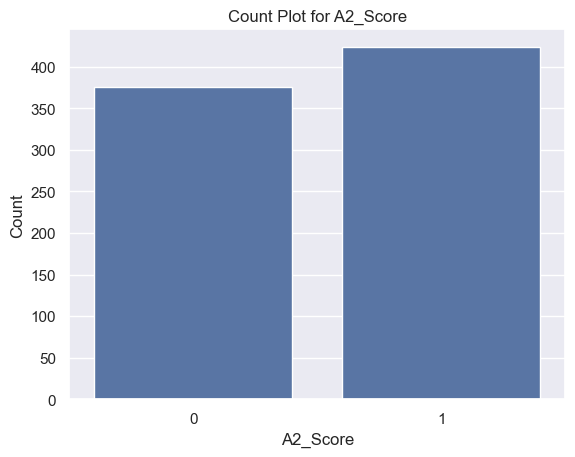

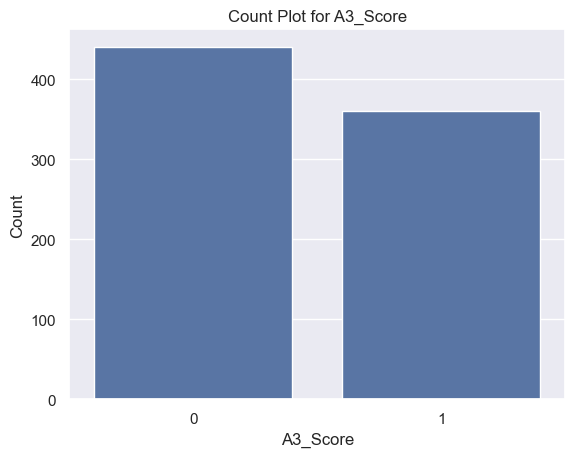

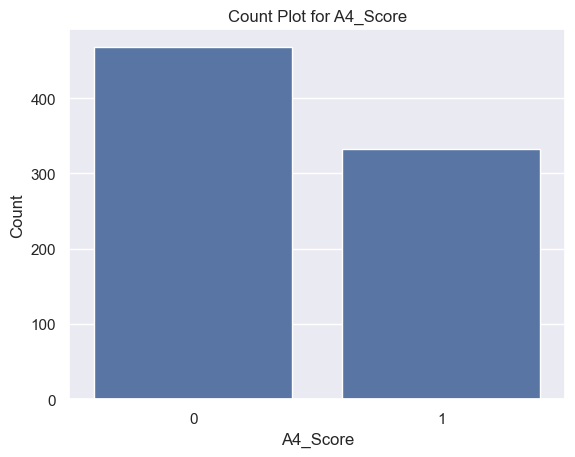

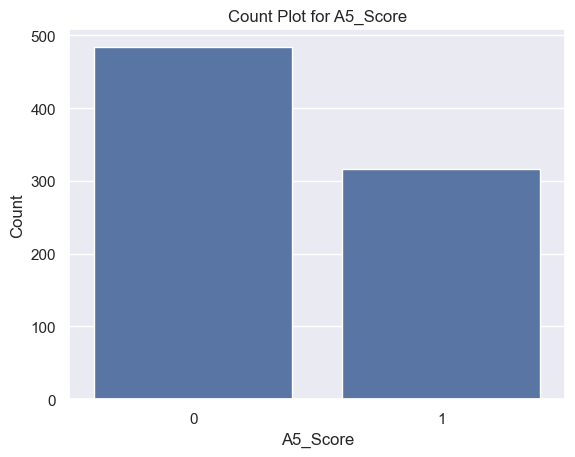

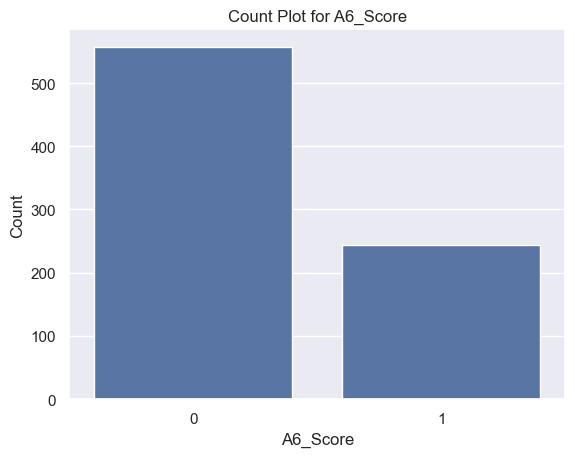

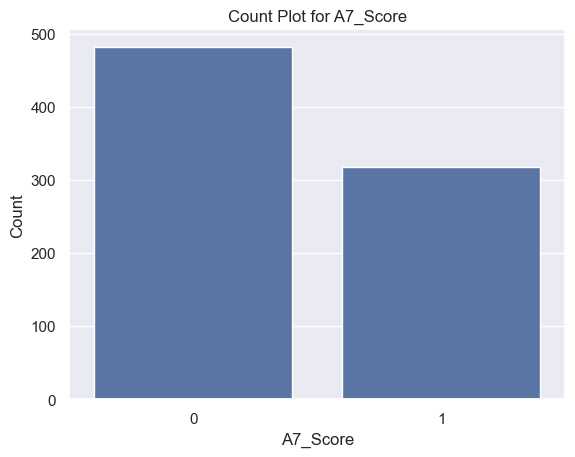

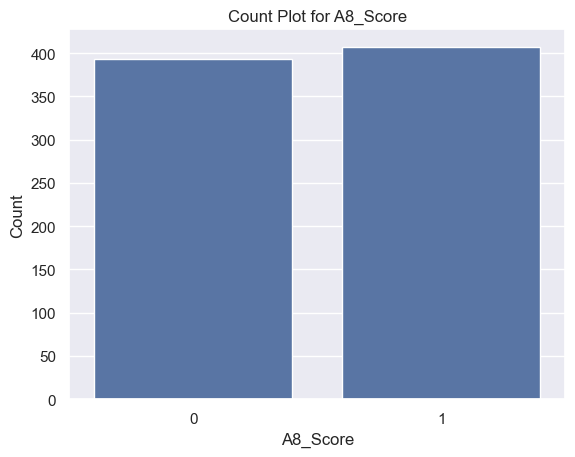

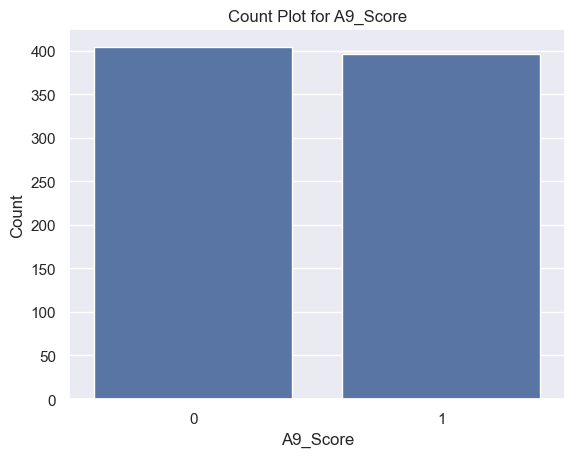

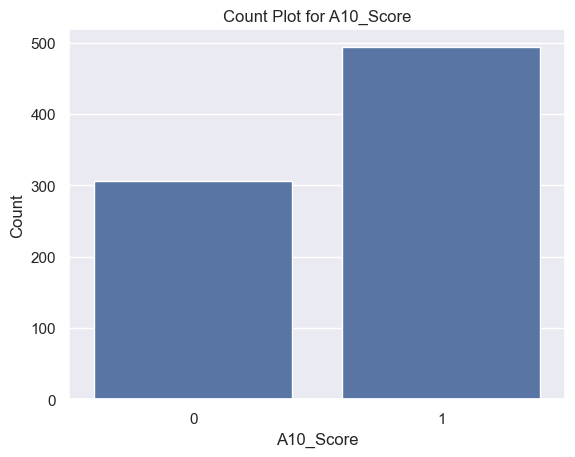

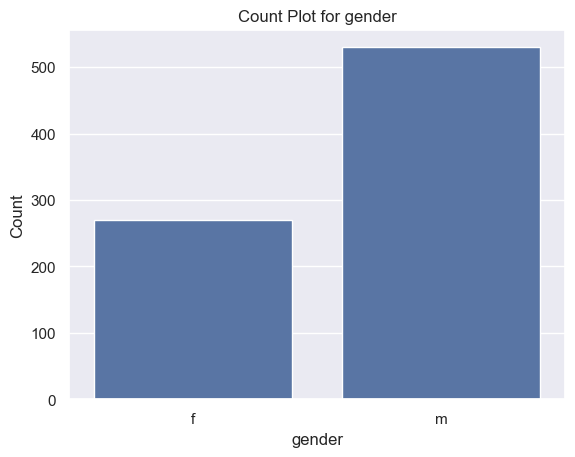

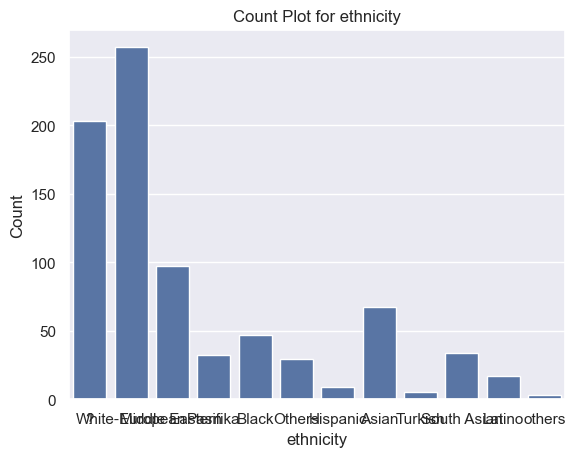

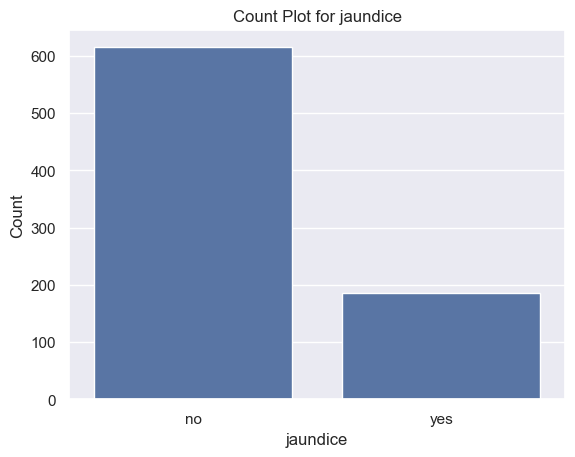

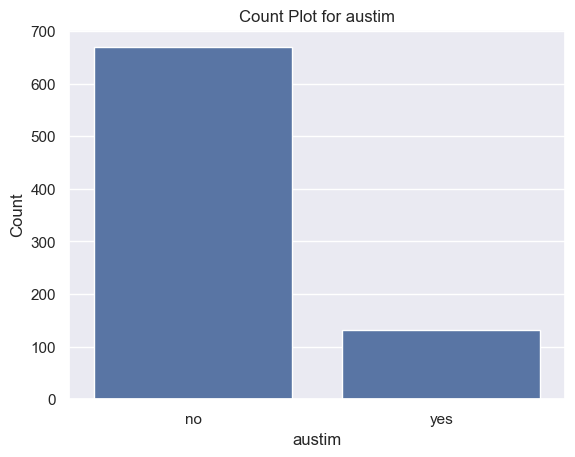

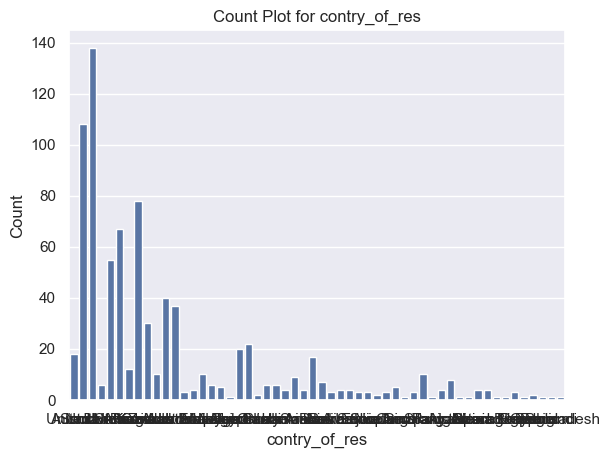

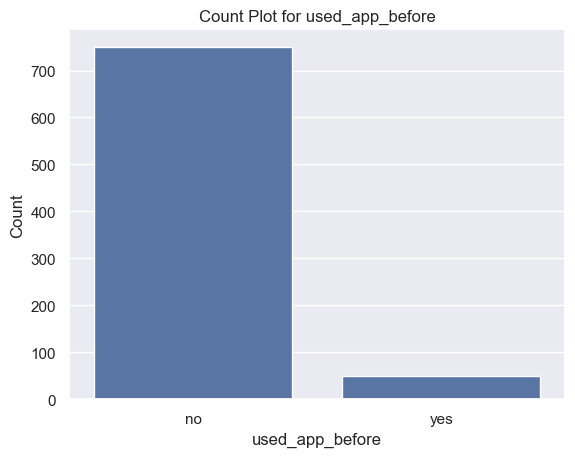

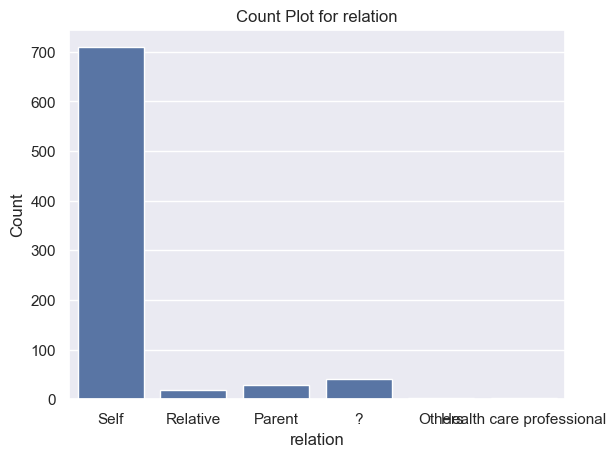

In [83]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

In [85]:
df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"})

In [87]:
df["relation"] = df["relation"].replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

In [89]:
# identify columns with "object" data type
object_columns = df.select_dtypes(include=["object"]).columns

In [93]:
import pickle
# initialize a dictionary to store the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder   # saving the encoder for this column


# save the encoders as a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

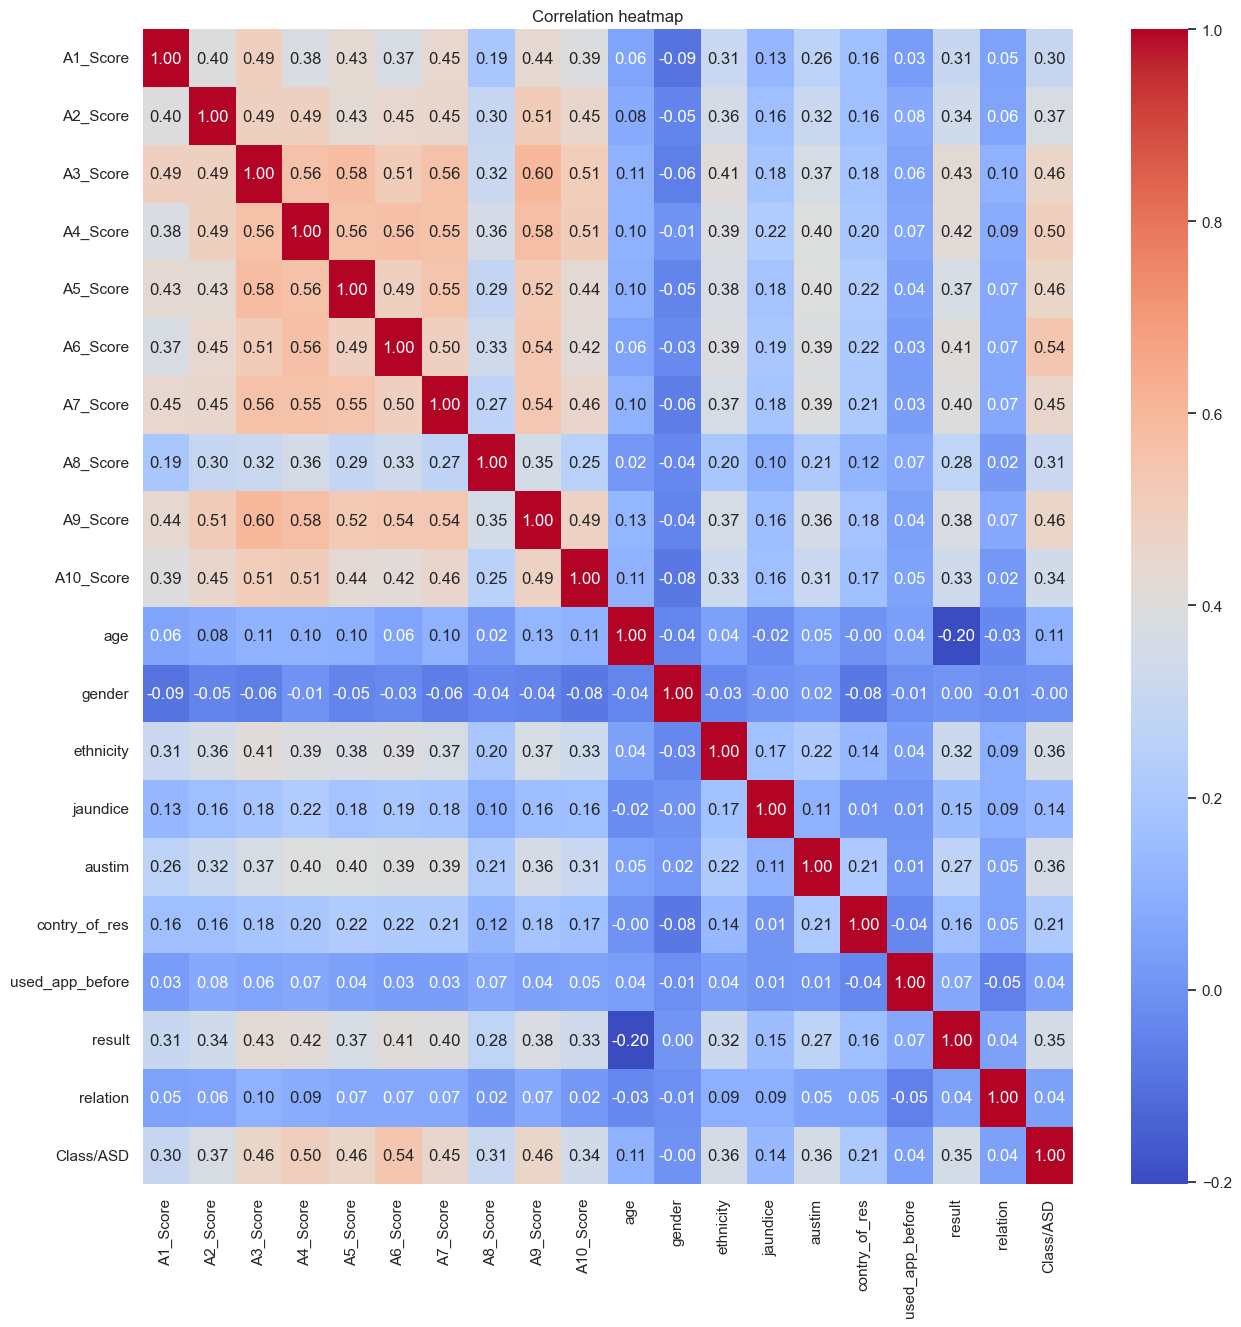

In [95]:
# correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [97]:
# function to replace the outliers with median
def replace_outliers_with_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  # replace outliers with median value
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df
    

In [99]:
# replace outliers in the "age" column
df = replace_outliers_with_median(df, "age")

# replace outliers in the "result" column
df = replace_outliers_with_median(df, "result")

In [101]:
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

C:\Users\prajualr\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [105]:
X_train_smote.shape

(1030, 19)

In [109]:
y_train_smote.value_counts()

Class/ASD
1    515
0    515
Name: count, dtype: int64

In [111]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [113]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.86
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.90
--------------------------------------------------


In [115]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [117]:
# fit the models
decision_tree.fit(X_train_smote, y_train_smote)
xgboost_classifier.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [121]:
# evaluate on DT
y_test_pred = decision_tree.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Confusion Matrix:
 [[107  17]
 [ 16  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       124
           1       0.54      0.56      0.55        36

    accuracy                           0.79       160
   macro avg       0.71      0.71      0.71       160
weighted avg       0.80      0.79      0.79       160



In [123]:
# evaluate on DT
y_test_pred1 = xgboost_classifier.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred1))
print("Classification Report:\n", classification_report(y_test, y_test_pred1))

Confusion Matrix:
 [[107  17]
 [ 14  22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       124
           1       0.56      0.61      0.59        36

    accuracy                           0.81       160
   macro avg       0.72      0.74      0.73       160
weighted avg       0.81      0.81      0.81       160

